In [48]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn  # 머신러닝 학습용 라이브러리
# Font에서 "-"기호가 깨지는걸 방지
plt.rcParams['axes.unicode_minus'] = False

# MatPlotLib 한글.
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.')

In [49]:
# Loading Dataset
train_data = pd.read_csv('./titanic/train.csv', index_col='PassengerId')

print(train_data.shape)
train_data.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train_data= train_data.drop(['Name','Ticket'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [63]:
print(train_data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [55]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [64]:
train_data.Survived.value_counts() * 100 /len(train_data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

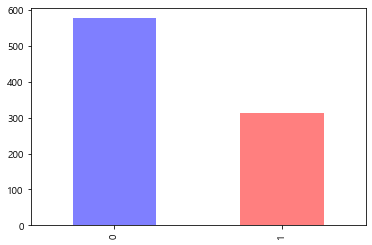

In [71]:
train_data['Sex'].value_counts().plot(kind='bar',
                                     color=['b','r'],
                                     alpha=0.5)

In [57]:
train_data.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [12]:
%matplotlib inline
import seaborn as sns

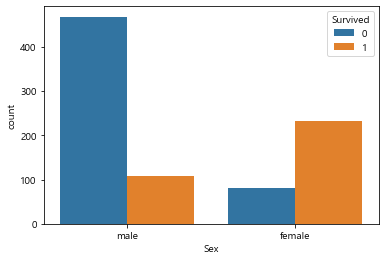

In [58]:
sns.countplot(data=train_data, x='Sex', hue='Survived')

In [60]:
# String format -> numerical mapping: male=0, female=1
train_data.loc[train_data['Sex']=='male', 'Sex'] = 0
train_data.loc[train_data['Sex']=='female', 'Sex'] = 1

print(train_data.shape)

(891, 9)


In [68]:
train_data['Pclass'].value_counts() * 100 / len(train_data)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

In [72]:
# Deaths per Pclass
train_data.groupby('Survived')['Pclass'].value_counts().sort_index()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64

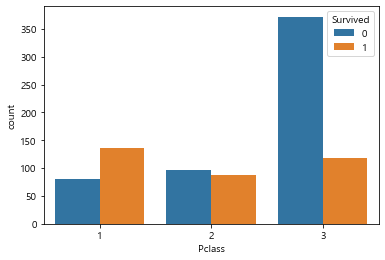

In [62]:
sns.countplot(data=train_data, x='Pclass', hue='Survived') 

In [89]:
#data[data['Survived']==1]['Age'].value_counts().sort_index()
bins =[0, 20,40,60, 80]
train_data['AgeBin'] = pd.cut(train_data['Age'], bins)
train_data['AgeBin'].tail()

PassengerId
887    (20.0, 40.0]
888     (0.0, 20.0]
889             NaN
890    (20.0, 40.0]
891    (20.0, 40.0]
Name: AgeBin, dtype: category
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80]]

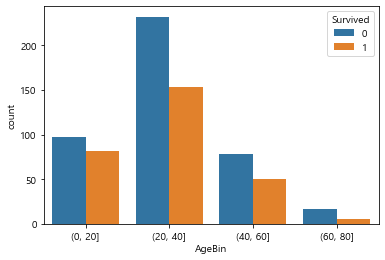

In [90]:
sns.countplot(data=train_data, x='AgeBin', hue='Survived') 

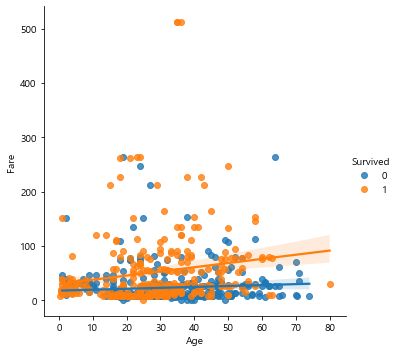

In [85]:
sns.lmplot(data = train_data, x='Age', y='Fare', hue='Survived')

In [98]:
train_data["Age_020"]=train_data["AgeBin"]=="(0,20]"
train_data["Age_2040"]=train_data["AgeBin"]=="(20, 40]"
train_data["Age_4060"]=train_data["AgeBin"]=="(40, 60]"
train_data["Age_6080"]=train_data["AgeBin"]=="(60, 80]"
print(train_data.shape) # (891,14)
train_data[["Age_020", "Age_2040", "Age_4060", "Age_6080"]].tail()

(891, 14)


,Age_020,Age_2040,Age_4060,Age_6080
PassengerId,,,,
887,False,False,False,False
888,False,False,False,False
889,False,False,False,False
890,False,False,False,False
891,False,False,False,False
